https://seaborn.pydata.org/tutorial/axis_grids.html

https://seaborn.pydata.org/generated/seaborn.PairGrid.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('./pairgrid_sample.xlsx')

In [3]:
df.head()

,company,city_flag,city_level,ev_2019,chrg,need,ev_ratio,chrg_rtaio,need_ratio
0,bhmc,1,1,100,10,8000,1.5,3.3,8
1,dyk,1,2,2000,20,60000,3.7,2.3,2
2,bhmc,2,3,3000,30,3000,3.2,4.5,3
3,dyk,1,2,400,20,2000,4.6,5.6,4
4,bhmc,2,1,300,40,30,7.3,6.7,5


In [18]:
df_pivot = df.pivot_table(values=['ev_ratio','need_ratio'],
    index='city_level',
    columns=['company','city_flag'],
    aggfunc='mean',
    fill_value=0,)

In [19]:
df_pivot.head()

ev_ratio                 need_ratio          
company        bhmc        dyk            bhmc    dyk   
city_flag         1    2     1    2          1  2   1  2
city_level                                              
1               1.5  7.3  0.00  0.0          8  5   0  0
2               0.0  0.0  4.15  0.0          0  0   3  0
3               0.0  3.2  0.00  0.0          0  3   0  0
4               0.0  0.0  0.00  2.4          0  0   0  6

In [20]:
df_pivot.columns

MultiIndex([(  'ev_ratio', 'bhmc', 1),
            (  'ev_ratio', 'bhmc', 2),
            (  'ev_ratio',  'dyk', 1),
            (  'ev_ratio',  'dyk', 2),
            ('need_ratio', 'bhmc', 1),
            ('need_ratio', 'bhmc', 2),
            ('need_ratio',  'dyk', 1),
            ('need_ratio',  'dyk', 2)],
           names=[None, 'company', 'city_flag'])

In [21]:
df_pivot.columns = [col[0] + f"_r{col[1]}" for col in df_pivot.columns]

In [22]:
df_pivot

,ev_ratio_rbhmc,ev_ratio_rbhmc,ev_ratio_rdyk,ev_ratio_rdyk,need_ratio_rbhmc,need_ratio_rbhmc,need_ratio_rdyk,need_ratio_rdyk
city_level,,,,,,,,
1,1.5,7.3,0.00,0.0,8,5,0,0
2,0.0,0.0,4.15,0.0,0,0,3,0
3,0.0,3.2,0.00,0.0,0,3,0,0
4,0.0,0.0,0.00,2.4,0,0,0,6


In [25]:
df.head()

,company,city_flag,city_level,ev_2019,chrg,need,ev_ratio,chrg_rtaio,need_ratio
0,bhmc,1,1,100,10,8000,1.5,3.3,8
1,dyk,1,2,2000,20,60000,3.7,2.3,2
2,bhmc,2,3,3000,30,3000,3.2,4.5,3
3,dyk,1,2,400,20,2000,4.6,5.6,4
4,bhmc,2,1,300,40,30,7.3,6.7,5


In [27]:
df1 = df.pivot(index='city_level', columns=['company','city_flag'], values='ev_ratio')

KeyError: 'Level company not found'

In [ ]:
df1 = df1.add_prefix(df1.columns.name + '_').rename_axis(None, axis=1).reset_index()

In [ ]:
df1.head()

In [ ]:
df.columns = [f"{a}_r{b}" for a, b in df.columns]
print (df)

# 2개 집단 간 상관관계

In [28]:

# a user-defined function of correlation coefficients with paired variables by groups

def corr_group(df, var_1, var_2, group_list):

    # correlaiton fuction with 2 variables

    corr_func = lambda g: g[var_1].corr(g[var_2])

    

    # GroupBy operator

    grouped = df.groupby(group_list)

    

    # calculate correlation coefficient by Group

    corr_coef_df = pd.DataFrame(grouped.apply(corr_func), columns=['corr_coef'])

    

    # add var_1, var_2 column names

    corr_coef_df['var1'] = var_1

    corr_coef_df['var2'] = var_2

    

    return corr_coef_df

https://rfriend.tistory.com/423 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

In [29]:
df.head(1)

,company,city_flag,city_level,ev_2019,chrg,need,ev_ratio,chrg_rtaio,need_ratio
0,bhmc,1,1,100,10,8000,1.5,3.3,8


In [31]:

# blank DataFrame

corr_coef_df_all = pd.DataFrame()

 

# group by list

group_list = ['company', 'city_flag', 'city_level']



# column lists for correlation matrix

col_list = ['ev_2019', 'chrg', 'need', 'ev_ratio']



# get all cominations of col_list with length 2

from itertools import combinations

comb = combinations(col_list, 2)



# calculate correlation coefficients pair-wise

for var in list(comb):

    corr_tmp = corr_group(df, var[0], var[1], group_list)

    corr_coef_df_all = corr_coef_df_all.append(corr_tmp)



# result

corr_coef_df_all[['var1', 'var2', 'corr_coef']]

E:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
E:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


var1      var2  corr_coef
company city_flag city_level                              
bhmc    1         1           ev_2019      chrg        NaN
        2         1           ev_2019      chrg        NaN
                  3           ev_2019      chrg        NaN
dyk     1         2           ev_2019      chrg        NaN
        2         4           ev_2019      chrg        NaN
bhmc    1         1           ev_2019      need        NaN
        2         1           ev_2019      need        NaN
                  3           ev_2019      need        NaN
dyk     1         2           ev_2019      need        1.0
        2         4           ev_2019      need        NaN
bhmc    1         1           ev_2019  ev_ratio        NaN
        2         1           ev_2019  ev_ratio        NaN
                  3           ev_2019  ev_ratio        NaN
dyk     1         2           ev_2019  ev_ratio       -1.0
        2         4           ev_2019  ev_ratio        NaN
bhmc    1         1              chrg      need        NaN
        2         1              chrg      need        NaN
                  3              chrg      need        NaN
dyk     1         2              chrg      need        NaN
        2         4              chrg      need        NaN
bhmc    1         1              chrg  ev_ratio        NaN
        2         1              chrg  ev_ratio        NaN
                  3              chrg  ev_ratio        NaN
dyk     1         2              chrg  ev_ratio        NaN
        2         4              chrg  ev_ratio        NaN
bhmc    1         1              need  ev_ratio        NaN
        2         1              need  ev_ratio        NaN
                  3              need  ev_ratio        NaN
dyk     1         2              need  ev_ratio       -1.0
        2         4              need  ev_ratio        NaN

In [30]:

# blank DataFrame

corr_coef_df_all = pd.DataFrame()

 

# group by list

group_list = ['group_1', 'group_2', 'group_3']



# column lists for correlation matrix

col_list = ['col_1', 'col_2', 'col_3', 'col_4']



# get all cominations of col_list with length 2

from itertools import combinations

comb = combinations(col_list, 2)



# calculate correlation coefficients pair-wise

for var in list(comb):

    corr_tmp = corr_group(df, var[0], var[1], group_list)

    corr_coef_df_all = corr_coef_df_all.append(corr_tmp)



# result

corr_coef_df_all[['var1', 'var2', 'corr_coef']]

KeyError: 'group_1'

In [32]:
df.head()

,company,city_flag,city_level,ev_2019,chrg,need,ev_ratio,chrg_rtaio,need_ratio
0,bhmc,1,1,100,10,8000,1.5,3.3,8
1,dyk,1,2,2000,20,60000,3.7,2.3,2
2,bhmc,2,3,3000,30,3000,3.2,4.5,3
3,dyk,1,2,400,20,2000,4.6,5.6,4
4,bhmc,2,1,300,40,30,7.3,6.7,5


In [33]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm



In [34]:
model = ols('ev_ratio ~ C(city_flag)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(city_flag),1.0,1.601667,1.601667,0.338858,0.591722
Residual,4.0,18.906667,4.726667,NaN,NaN


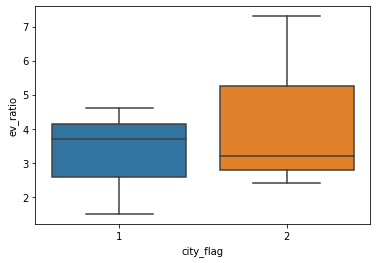

In [35]:
import seaborn as sns
sns.boxplot(x='city_flag', y='ev_ratio',data=df)

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [45]:
cw_lm=ols('ev_ratio ~ need_ratio+need+chrg_rtaio + C(city_flag)', data=df).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm, typ=2))

                 sum_sq   df         F    PR(>F)
C(city_flag)   0.516120  1.0  0.051482  0.857958
need_ratio     2.541137  1.0  0.253476  0.703071
need           0.256084  1.0  0.025544  0.899105
chrg_rtaio     5.110527  1.0  0.509770  0.605265
Residual      10.025170  1.0       NaN       NaN


In [40]:
cw_lm=ols('ev_ratio ~ need_ratio+need+chrg_rtaio + C(city_flag)', data=df).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm, typ=2))

                 sum_sq   df         F    PR(>F)
C(city_flag)   0.516120  1.0  0.051482  0.857958
need_ratio     2.541137  1.0  0.253476  0.703071
need           0.256084  1.0  0.025544  0.899105
chrg_rtaio     5.110527  1.0  0.509770  0.605265
Residual      10.025170  1.0       NaN       NaN


In [ ]:
cw_lm=ols('weight ~ Time + C(Diet)', data=cw).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm, typ=2))

In [55]:
df.head()

,company,city_flag,city_level,ev_2019,chrg,need,ev_ratio,chrg_rtaio,need_ratio
0,bhmc,1,1,100,10,8000,1.5,3.3,8
1,dyk,1,2,2000,20,60000,3.7,2.3,2
2,bhmc,2,3,3000,30,3000,3.2,4.5,3
3,dyk,1,2,400,20,2000,4.6,5.6,4
4,bhmc,2,1,300,40,30,7.3,6.7,5


In [56]:
formula = 'ev_ratio ~ need_ratio+need+chrg_rtaio + C(city_flag) + C(company) '

lm = ols(formula, df).fit()

print(anova_lm(lm))

               df        sum_sq    mean_sq    F  PR(>F)
C(city_flag)  1.0  1.601667e+00   1.601667  0.0     NaN
C(company)    1.0  1.333333e-02   0.013333  0.0     NaN
need_ratio    1.0  3.017760e+00   3.017760  0.0     NaN
need          1.0  1.071260e+00   1.071260  0.0     NaN
chrg_rtaio    1.0  1.480431e+01  14.804314  0.0     NaN
Residual      0.0  2.986360e-22        inf  NaN     NaN


E:\Anaconda\lib\site-packages\statsmodels\stats\anova.py:140: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))
E:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
E:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
E:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [57]:
formula = 'ev_ratio ~ need_ratio+need+chrg_rtaio + C(city_flag):C(company) '

lm = ols(formula, df).fit()

print(anova_lm(lm))

ValueError: shapes (5,7) and (6,) not aligned: 7 (dim 1) != 6 (dim 0)

In [ ]:
from scipy.stats import ttest_1samp
tstat, pval = ttest_1samp(data, expected_mean)

In [ ]:
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(data1, data2)

In [ ]:
from scipy.stats import f_oneway
fstat, pval = f_oneway(data1, data2, data3)

# 사후검정 Tukey’s Range Test

In [ ]:
from scipy.stats import f_oneway
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
fstat, pval = f_oneway(data1, data2, data3)
# np.concatenate를 통해 데이터를 합쳐 놓는다.
v = np.concatenate([data1, data2, data3])
# 데이터 개수만큼 레이블을 준비한다.
labels = ['data1']*len(data1) + ['data2']*len(data3) + ['data3']*len(data3)
# 사후 검정을 수행한다.
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)

# 이항검증 : 범주2개

In [ ]:
from scipy.stats import binom_test
pval = binom_test(525, n=1000, p=0.5) # 성공 횟수, 시도 횟수, 기대 성공 확률.

# 카이제곱 검정 (Chi Square Test) : 범주 3개이상

In [ ]:
#          A    B  
# -----------------
# 1st | 30 | 10
# 2nd | 35 |  5
# 3rd | 28 | 12
# 4th | 20 | 20
data = [[30, 10],
     [35, 5],
     [28, 12],
     [20, 20]]





In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
company       6 non-null object
city_flag     6 non-null int64
city_level    6 non-null int64
ev_2019       6 non-null int64
chrg          6 non-null int64
need          6 non-null int64
ev_ratio      6 non-null float64
chrg_rtaio    6 non-null float64
need_ratio    6 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 560.0+ bytes


In [48]:
df2 = df[['ev_ratio','need_ratio']]

In [49]:
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(df2)

In [50]:
pval

0.2611962978366663

In [51]:
chi2

6.4925428069719215

In [52]:
dof

5

In [53]:
expected

array([[4.25345168, 5.24654832],
       [2.55207101, 3.14792899],
       [2.77593688, 3.42406312],
       [3.8504931 , 4.7495069 ],
       [5.50710059, 6.79289941],
       [3.76094675, 4.63905325]])

In [6]:
df.columns

Index(['company', 'city_flag', 'city_level', 'ev_2019', 'chrg', 'need',
       'ev_ratio', 'chrg_rtaio', 'need_ratio'],
      dtype='object')

In [7]:
df2 = df[['company', 'city_flag', 'city_level', 'ev_2019', 'chrg', 'need']].copy()

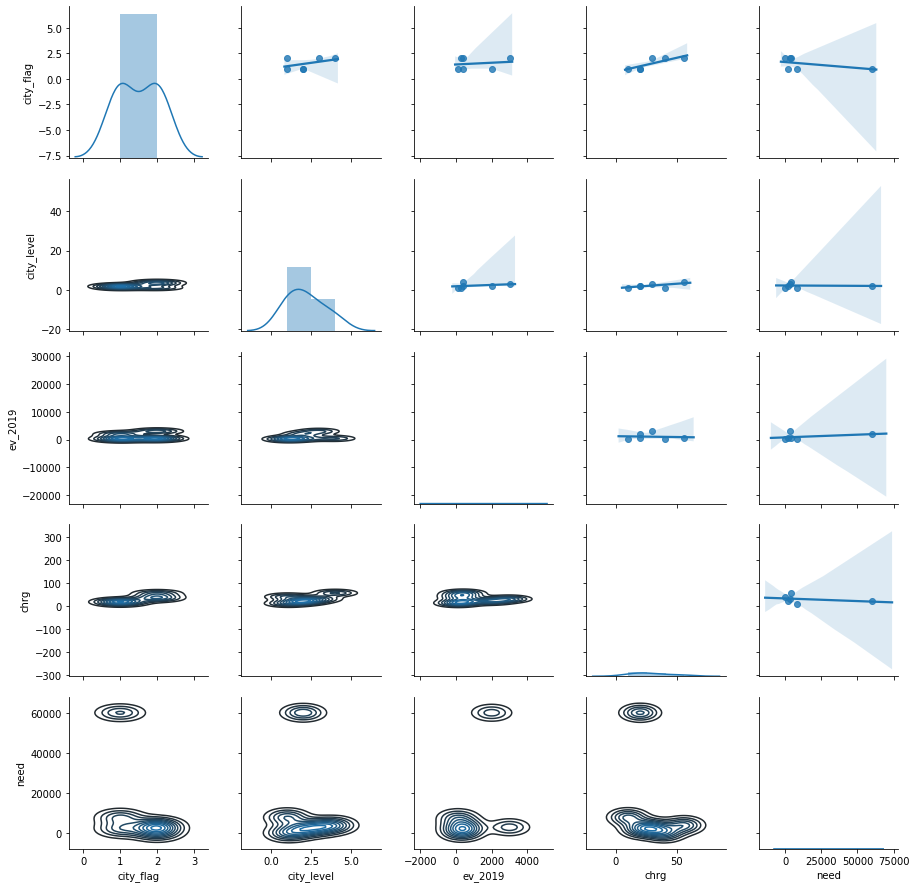

In [8]:
pg = sns.PairGrid(df2) # pairgrid 형태 만들기
pg.map_upper(sns.regplot) # 위쪽 그래프에 넣을 plot 
pg.map_lower(sns.kdeplot) # 아래쪽 그래프에 넣을 plot 
pg.map_diag(sns.distplot) # 가운데 그래프에 넣을 plot 

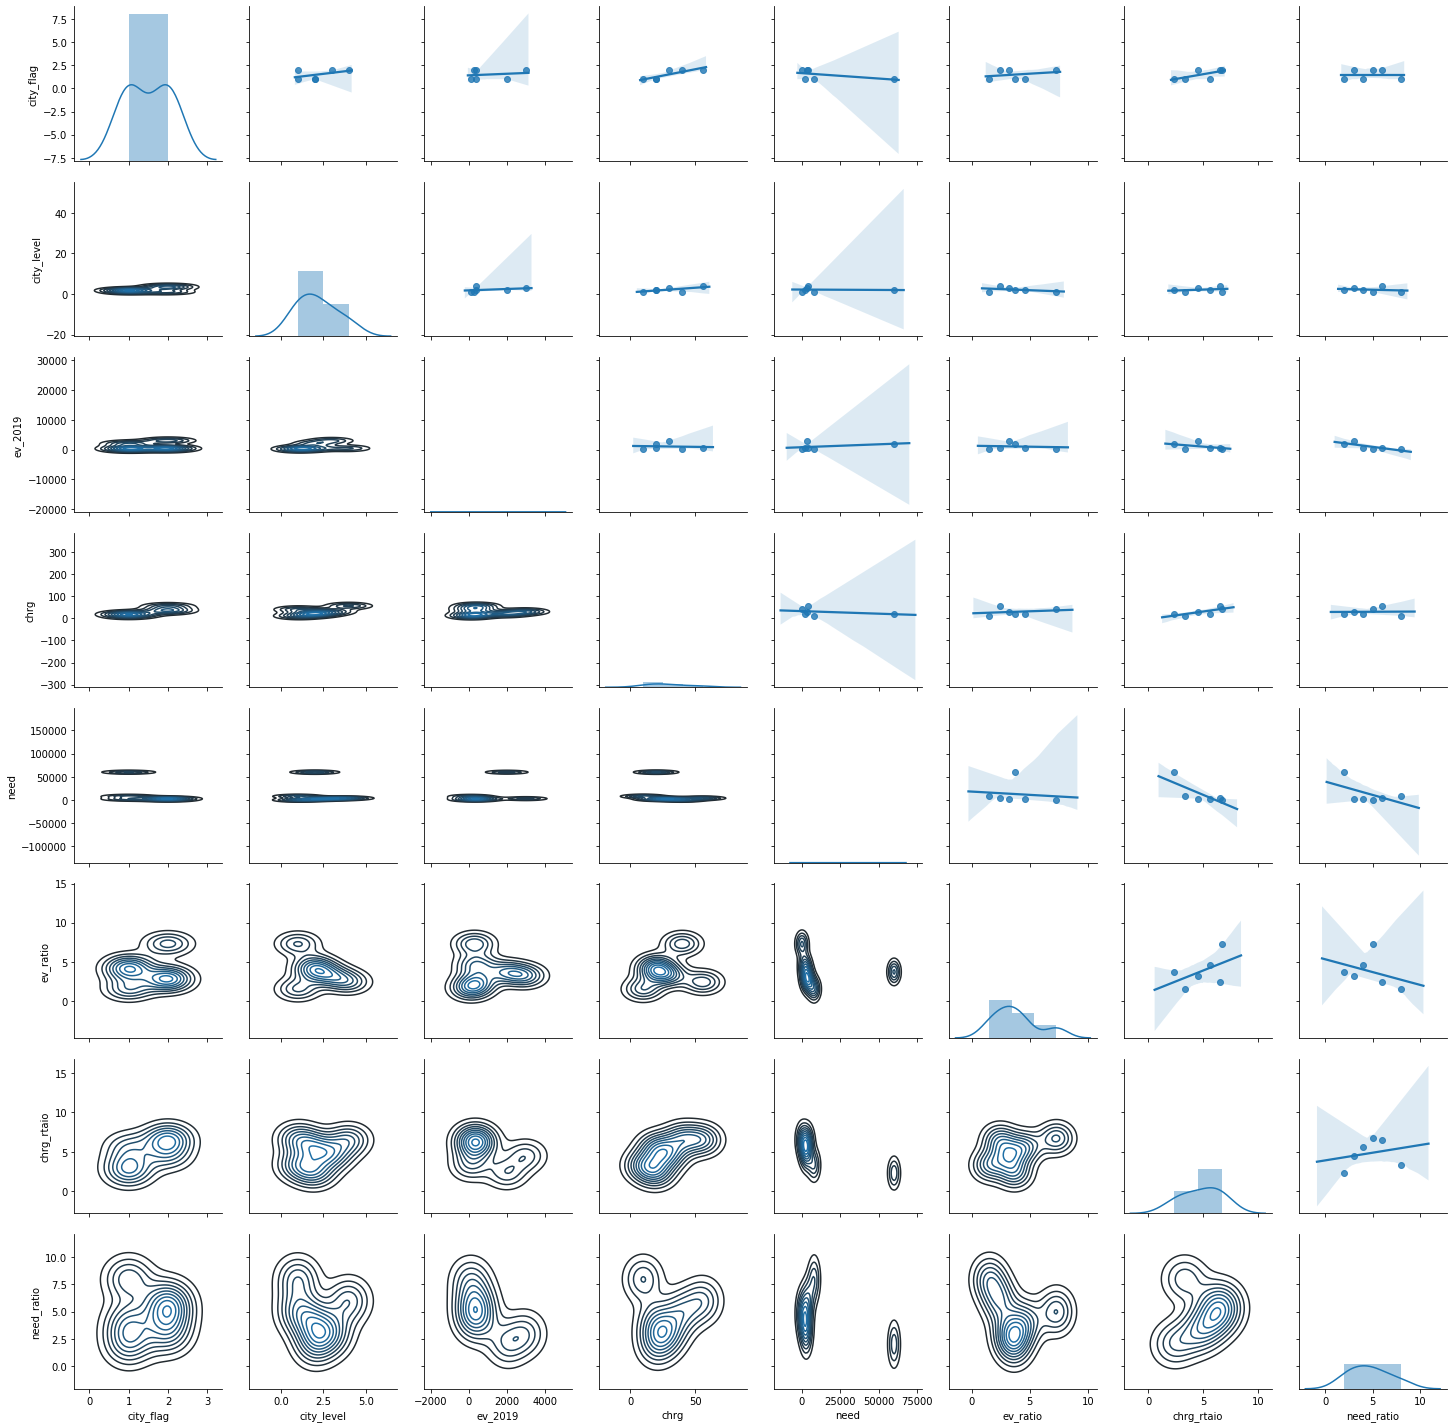

In [5]:
pg = sns.PairGrid(df) # pairgrid 형태 만들기
pg.map_upper(sns.regplot) # 위쪽 그래프에 넣을 plot 
pg.map_lower(sns.kdeplot) # 아래쪽 그래프에 넣을 plot 
pg.map_diag(sns.distplot) # 가운데 그래프에 넣을 plot 

In [ ]:
pg = sns.PairGrid(df2) # pairgrid 형태 만들기
pg.map_offdiag(plt.scatter) # 위쪽 그래프에 넣을 plot 
pg.map_diag(plt.hist)# 아래쪽 그래프에 넣을 plot 
pg.map_diag(sns.distplot) # 가운데 그래프에 넣을 plot 

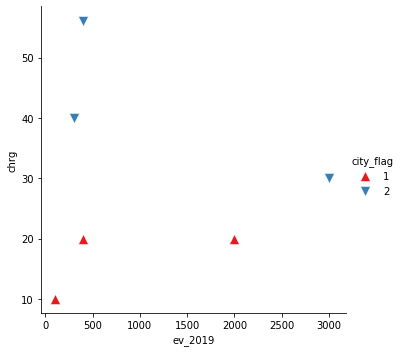

In [10]:
g = sns.FacetGrid(df2, hue="city_flag", palette="Set1", height=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "ev_2019", "chrg", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

In [ ]:
g = sns.FacetGrid(tips, hue="time", col="sex", height=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend();

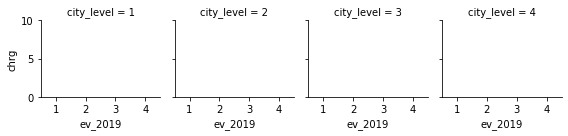

In [15]:
g = sns.FacetGrid(df2, col="city_level", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "ev_2019", "chrg", order=[1, 2, 3, 4], color=".3", ci=None);

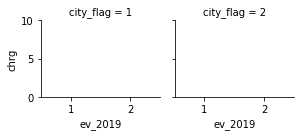

In [14]:
g = sns.FacetGrid(df2, col="city_flag", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "ev_2019", "chrg", order=[1, 2], color=".3", ci=None);

In [ ]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);

In [ ]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14));

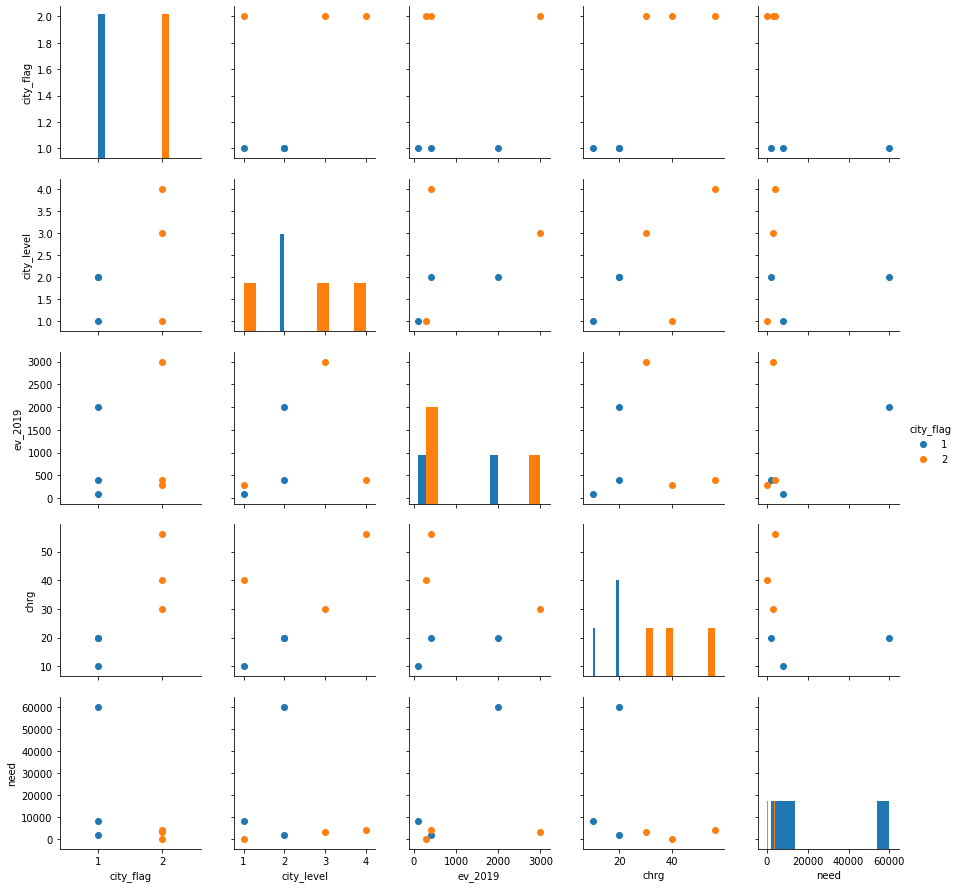

In [20]:
g = sns.PairGrid(df2, hue="city_flag")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

In [ ]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(plt.scatter);

In [ ]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")

g =  sns.PairGrid(iris, hue='species', size=2)

def f(x, **kwargs):
       kwargs.pop("color")
       col = next(plt.gca()._get_lines.prop_cycler)['color']
       sns.kdeplot(x, color=col, **kwargs)

g.map_diag(f)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

In [ ]:
import seaborn as sns
#del data['Id'] # 인덱스 열 삭제
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

In [ ]:
sns.lmplot(data=df, x="Annual Income (k$)", y = 'Spending Score (1-100)', hue = "Gender", fit_reg=False)

In [ ]:
# 군집수를 4로 지정하여 시각화 해봅니다. 
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

https://codedragon.tistory.com/9379

https://chancoding.tistory.com/12

http://blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220968297927&parentCategoryNo=49&categoryNo=&viewDate=&isShowPopularPosts=true&from=search

https://jaehyeongan.github.io/2019/04/27/logistic-regression/

https://wikidocs.net/35476